<a href="https://colab.research.google.com/github/patbaa/demo_notebooks/blob/master/class_activation_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class activation maps

A short implementation for the class activation maps as introduces in:

Zhou et al, 2015: Learning Deep Features for Discriminative Localization  
https://arxiv.org/pdf/1512.04150.pdf

In [9]:
import cv2
import pandas as pd
from PIL import Image
from tensorflow.keras import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
!wget -q -O classes.txt https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
    
f = open('classes.txt')
imagenet_classes = eval(f.read())
f.close()

imagenet_classes[0]

'tench, Tinca tinca'

In [11]:
model = ResNet50()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [12]:
activation_maps = model.get_layer('conv5_block3_out').output
class_weights   = model.get_layer('predictions').weights[0].numpy()

model_vis = Model(model.input, [activation_maps, model.get_layer('predictions').output])

In [13]:
def plot_class_act_map(img, class_id):
    # [None] is to make a match of 1 image
    preprocessed_input = preprocess_input(np.array(img)[None])
    maps, preds = model_vis.predict(preprocessed_input)
    
    # we have only 1 img in out batch
    class_activation_maps = (maps@class_weights)[0] 
    
    class_map = class_activation_maps[...,class_id]
    class_map = (class_map - class_map.min())/(class_map.max() - class_map.min())
    
    plt.figure(figsize=(8, 8), frameon=True)
    ext = 0, 1, 0, 1
    plt.title(imagenet_classes[class_id], fontsize=15)
    plt.imshow(img, extent=ext)
    plt.imshow(class_map, interpolation='quadric', 
               cmap=plt.cm.jet, vmin=0, vmax=1, alpha=0.5, extent=ext)
    plt.axis('off')
    plt.show()

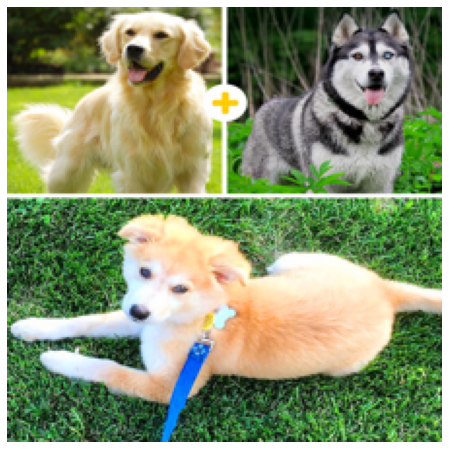

In [14]:
!wget -q -O img1.jpg https://kutyafan.hu/wp-content/uploads/2017/10/15-le%C3%ADrhatatlanul-aranyos-kever%C3%A9k-kutya5.jpg
img = Image.open('img1.jpg').resize((224, 224))

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img)
plt.show()

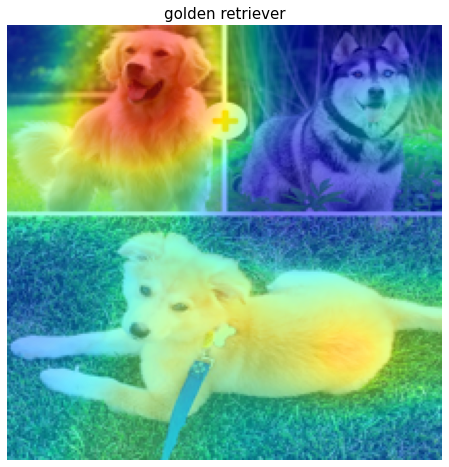

In [15]:
plot_class_act_map(img, 207)

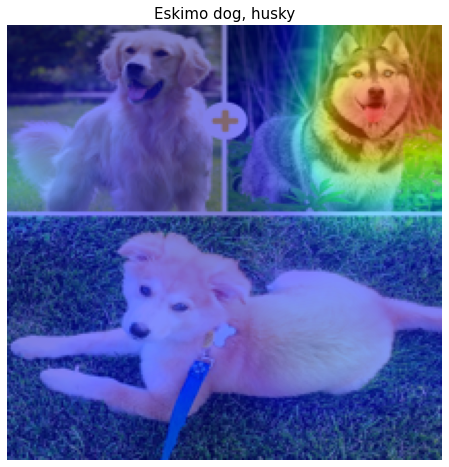

In [16]:
plot_class_act_map(img, 248)

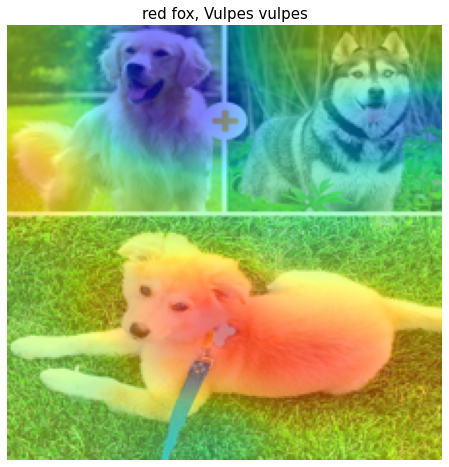

In [17]:
plot_class_act_map(img, 277)

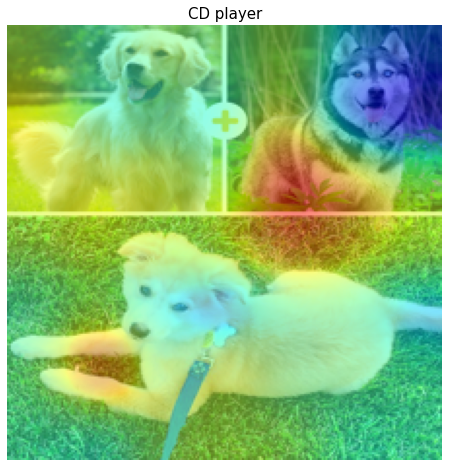

In [18]:
plot_class_act_map(img, 485)

# Another example

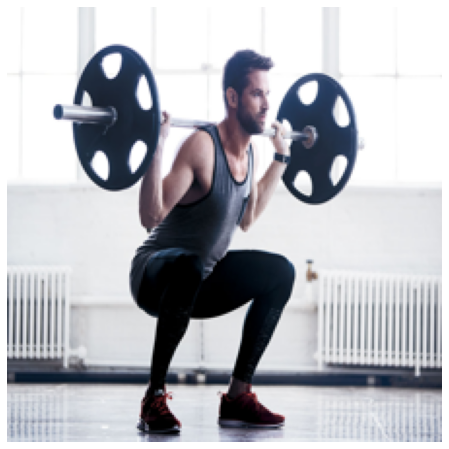

In [19]:
!wget -q -O weight.jpg https://www.mensjournal.com/wp-content/uploads/mf/_main_liftlift.jpg
img = Image.open('weight.jpg').resize((224, 224))

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img)
plt.show()

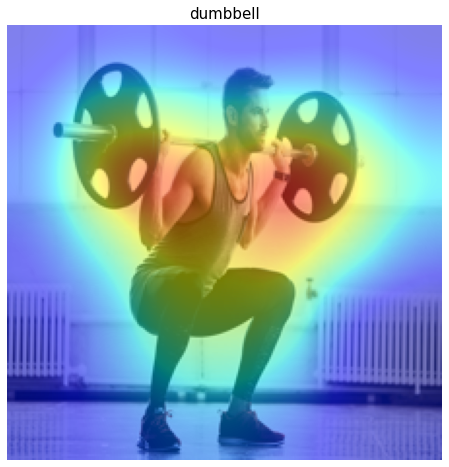

In [20]:
plot_class_act_map(img, 543)

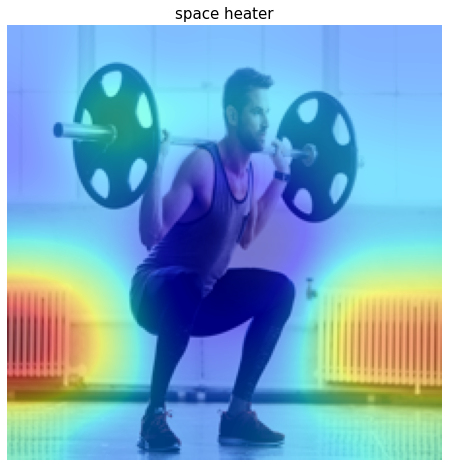

In [21]:
plot_class_act_map(img, 811)

Does not work always as expected

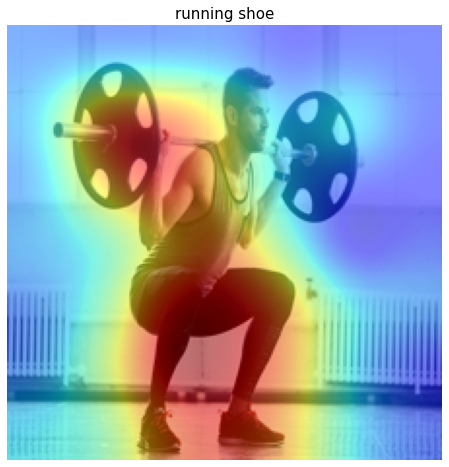

In [22]:
plot_class_act_map(img, 770)